# Investigate a Dataset - Titanic Data

## What factors made people more likely to survive?

In [1]:
from scripts import titanic
titanic_obj = titanic.titanic_analysis()

### Titanic Data

Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on [the Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.

### Numerical Analysis

* The overall survival rate is just 38%, but for woman is 74%, so `Sex` may be an important factor affecting survival

In [2]:
N = titanic_obj.titanic_data.shape[0] #sample size
print 'overall survival rate is ' + str(float(titanic_obj.titanic_data.Survived.sum())/N)
N_female = titanic_obj.titanic_data[titanic_obj.titanic_data.Sex == 'female'].shape[0]
print 'survival rate for woman is ' + \
        str(float(titanic_obj.titanic_data[titanic_obj.titanic_data.Sex == 'female'].Survived.sum())/N_female)

overall survival rate is 0.383838383838
survival rate for woman is 0.742038216561


* `Cabin` have too many missing values, we choose to ignore this column, because it can not provide much information
* Just two missing values in `Embarked`, ignore the data from these two will not have much of an impact to analysis results
* I think `Age` may be one of the key factors affecting the survival, it is necessary to deal with missing values, detailed processing procedure will be discuss later 

In [3]:
titanic_obj.titanic_data.isnull().sum() # get numbers of nan for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualization

* As a result of Numerical Analysis, data visualization shows more apparent effects of gender on survival

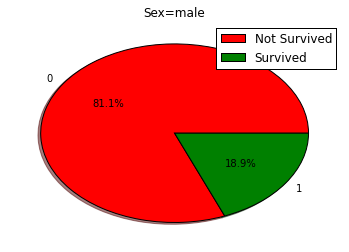

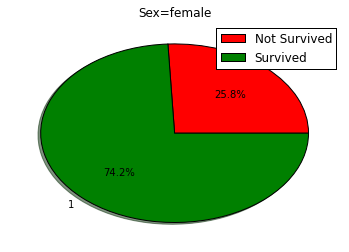

In [4]:
%matplotlib inline 
titanic_obj.draw_pie_chart('Sex', 'male')
titanic_obj.draw_pie_chart('Sex', 'female')

* Then we do a further two-dimensional graphical treemap for sex, which block represents sample size and the color represents suvival rate

* Get data for treemap by the following method

In [5]:
titanic_obj.get_treemap('Sex', 'Pclass')

'[["Location", "Parent", "Numbers of Passenger(size)", "Survival Rate(color)"], ["Sex&Pclass", null, 0, 0], ["Sex=female&Pclass=1", "Sex&Pclass", 94, 0.9680851063829787], ["Sex=female&Pclass=2", "Sex&Pclass", 76, 0.9210526315789473], ["Sex=female&Pclass=3", "Sex&Pclass", 144, 0.5], ["Sex=male&Pclass=1", "Sex&Pclass", 122, 0.36885245901639346], ["Sex=male&Pclass=2", "Sex&Pclass", 108, 0.1574074074074074], ["Sex=male&Pclass=3", "Sex&Pclass", 347, 0.13544668587896252]]'

* Although the survival rate of women higher than men, but women in `Pclass` = 3 women are not so lucky

![img1](https://raw.githubusercontent.com/ShaneKao/Titanic-Data/master/Analyzing_the_NYC_Subway_Dataset/image/pclass3_female.png)

In [56]:
survival_pclass3_female = titanic_obj.titanic_data[titanic_obj.titanic_data.Sex=='female'] \
                                                [titanic_obj.titanic_data.Pclass==3].Survived.tolist()
'survival rate for pclass = 3 and female is ' + str(float(sum(survival_pclass3_female))/float(len(survival_pclass3_female)))

'survival rate for pclass = 3 and female is 0.5'

### Data Wrangling

* Delete `Cabin` & Delete missing values of `Embarked` 

* Salutation in `Name` provide us rough guess for `Age`, the following figure shows the highly relationship between these two variable

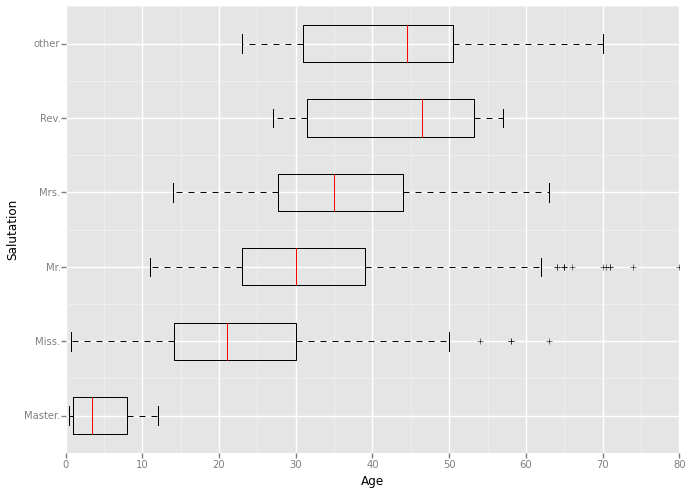

<ggplot: (34428402)>

In [6]:
from ggplot import *
df = titanic_obj.titanic_data
df['Salutation'] = df.apply(lambda x: titanic_obj.get_salutation(x['Name']), axis=1)
ggplot(df, aes(x='Age', y='Salutation')) + geom_boxplot()

* We use the median age of the same `Salutation` to fill the missing values of `Age`

* Show data that ready for analysis

In [7]:
titanic_obj.titanic_data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr.
5,6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,Mrs.


### Data Analysis

#### Apriori

USE Apriori to find frequent set which is contains `Survived`

* Consider `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`, `Salutation`

In [10]:
df = titanic_obj.titanic_data_cleaned
df = df.iloc[:,[1, 2, 4, 6, 7, 10, 11]]

* set minsup to 0.4 

In [11]:
from scripts.apriori import apriori
### add prefix ###
df.Survived = df.Survived.apply(lambda x: 'Survived = ' + str(x))
df.Pclass = df.Pclass.apply(lambda x: 'Pclass = ' + str(x))
df.Sex = df.Sex.apply(lambda x: 'Sex = ' + str(x))
df.SibSp = df.SibSp.apply(lambda x: 'SibSp = ' + str(x))
df.Parch = df.Parch.apply(lambda x: 'Parch = ' + str(x))
df.Embarked = df.Embarked.apply(lambda x: 'Embarked = ' + str(x))
df.Salutation = df.Salutation.apply(lambda x: 'Salutation = ' + str(x))
F = apriori(df.values.tolist(), 0.4)

* The frequent set which is contains Survived

In [12]:
for i in F:
    if 'Survived = 0' in i or 'Survived = 1' in i:
        print i

['Survived = 0']
['Embarked = S', 'Survived = 0']
['Parch = 0', 'Survived = 0']
['Pclass = 3', 'Survived = 0']
['Salutation = Mr.', 'Survived = 0']
['Sex = male', 'Survived = 0']
['SibSp = 0', 'Survived = 0']
['Embarked = S', 'Sex = male', 'Survived = 0']
['Parch = 0', 'Salutation = Mr.', 'Survived = 0']
['Parch = 0', 'Salutation = Mr.', 'Sex = male', 'Survived = 0']
['Parch = 0', 'Sex = male', 'Survived = 0']
['Parch = 0', 'SibSp = 0', 'Survived = 0']
['Salutation = Mr.', 'Sex = male', 'Survived = 0']
['Sex = male', 'SibSp = 0', 'Survived = 0']
['Parch = 0', 'Salutation = Mr.', 'Sex = male', 'Survived = 0']


* `Sex` = male and 'Survived = 0' occurs frequently, such a result is consistent with the previous visualization results, moreover, `SibSp` = 0, `Parch` = 0, `Embarked` = S and `Pclass` = 3 have less survival rate

* The results did not include any frequent sets containing `Survived` = 1, because overall survival rate about 38% and we set minsup to 0.4, if we lower minsup, the results will be too messy, too many frequently set, not easy to read

#### Decision Trees

* Consider `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`, `Salutation`, `Age`, `Fare`

In [13]:
df = titanic_obj.titanic_data_cleaned
df_X = df.iloc[:,[2, 4, 5, 6, 7, 9, 10, 11]]

* Label encoder, as follows
* Sex = male -> 1, Sex = female -> 0
* Embarked = C -> 0, Embarked = Q -> 1, Embarked = S -> 2
* Salutation = 	Dr. -> 0, Salutation = Master. -> 1, Salutation = Miss. -> 2, Salutation = 	Mr. -> 3, Salutation = 	Mrs. -> 4,  Salutation = Rev. -> 5
    

In [14]:
### Label encoder ###
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_X.Sex = lb.fit_transform(df_X.Sex)
df_X.Embarked = lb.fit_transform(df_X.Embarked)
df_X.Salutation = lb.fit_transform(df_X.Salutation)

* Train tree model, where `max_depth` means the maximum depth of the tree, `min_samples_leaf` is The minimum number of samples required to be at a leaf node and max_leaf_nodes means grow a tree with max_leaf_nodes in best-first fashion. 

In [15]:
import numpy as np
from sklearn import tree
X = np.array(df_X.values.tolist())
Y = np.array(df.Survived.tolist())
clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 3, max_leaf_nodes = 5)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

* Find rule

In [16]:
from scripts.tree_rule import get_rule
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Salutation']
get_rule(clf, feature_names)

if ( Sex < 0.5 ) {
if ( Pclass < 2.5 ) {
return [[   9.  159.]]
} else {
return [[ 72.  72.]]
}
} else {
if ( Salutation < 1.0 ) {
if ( SibSp < 2.5 ) {
return [[  0.  22.]]
} else {
return [[ 17.   1.]]
}
} else {
return [[ 451.   86.]]
}
}


* Use the above results for the word tree data visualization

![img2](https://raw.githubusercontent.com/ShaneKao/Titanic-Data/master/Analyzing_the_NYC_Subway_Dataset/image/tree_result.png)

* Although male survival rate is low, but child for sibsp in 0,1 and 2 all survived

### Discussion

* All results show the survival rate of women higher than men

* `Age` is not in tree model, probably because there is a strong relation with `Salutation`

* Tree model results obtained more detailed than apiori, which is not restricted by minsup

### Reference

* [ggplot](http://ggplot.yhathq.com/)

* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

* [matplotlib](http://matplotlib.org/contents.html)

* [google chart](https://developers.google.com/chart/interactive/docs/?hl=zh-TW)

* [apriori](http://www.jianshu.com/p/00103435ef89)

* [Get Tree Rlue](http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree)